In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 数据导入
datas = pd.read_csv('tiny_word_vectors.txt', header=None, sep=" ") 
words = datas[0]
words = words.to_numpy()
datas = pd.DataFrame(datas.values.T, index=datas.columns, columns=datas.index)
datas_no_label = datas.iloc[1:,:]

In [2]:
# 使用numpy实现PCA
def pca1(data, n_component):
    data = data.T
    data -= data.mean(axis = 1).reshape(-1, 1)
    cov_matrix = 1 / len(data[0]) * data @ data.T
    eigenvalues, eigenmatrix = np.linalg.eig(cov_matrix)
    new_data = eigenmatrix.T @ data
    idx = np.argsort(-eigenvalues)[0:n_component]
    return new_data[idx]

In [3]:
datas_np = datas_no_label.to_numpy(dtype=np.float64)

C:\Users\Lenovo\.conda\envs\pytorch1\lib\site-packages\matplotlib\collections.py:200: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)
C:\Users\Lenovo\.conda\envs\pytorch1\lib\site-packages\matplotlib\text.py:830: ComplexWarning: Casting complex values to real discards the imaginary part
  x = float(self.convert_xunits(self._x))
C:\Users\Lenovo\.conda\envs\pytorch1\lib\site-packages\matplotlib\text.py:831: ComplexWarning: Casting complex values to real discards the imaginary part
  y = float(self.convert_yunits(self._y))
C:\Users\Lenovo\.conda\envs\pytorch1\lib\site-packages\matplotlib\text.py:690: ComplexWarning: Casting complex values to real discards the imaginary part
  posx = float(self.convert_xunits(self._x))
C:\Users\Lenovo\.conda\envs\pytorch1\lib\site-packages\matplotlib\text.py:691: ComplexWarning: Casting complex values to real discards the imaginary part
  posy = float(self.convert_yunits(self._y))


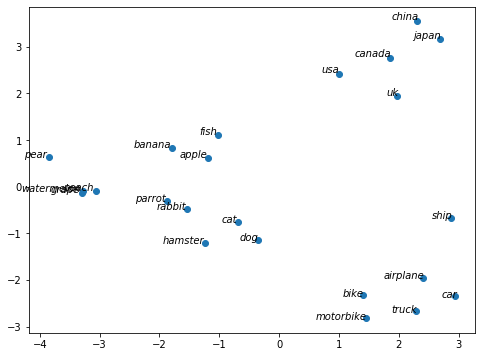

In [4]:
new_data = pca1(datas_np.T, 2)
# Draw scatter plot
x = new_data[0]
y = new_data[1]
fig=plt.figure(figsize=(8,6)) 
ax=plt.subplot(1,1,1) 
ax.scatter(x, y) 
for i in range(len(x)):
    ax.text(x[i]*1.01, y[i]*1.01, words[i], fontsize=10,  style = "italic",horizontalalignment='right', weight = "light", rotation=0) #给散点加标签
plt.show()

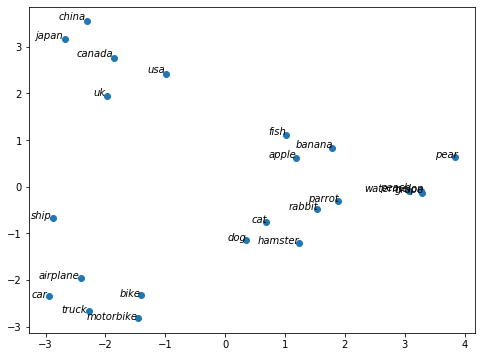

In [5]:
# 使用sklearn库中实现的PCA降维方法将词向量降维到2维
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
new_data1 = pca.fit_transform(datas_np.T).T
# Draw scatter plot
x = new_data1[0]
y = new_data1[1]
fig=plt.figure(figsize=(8,6)) 
ax=plt.subplot(1,1,1) 
ax.scatter(x, y) 
for i in range(len(x)):
    ax.text(x[i]*1.01, y[i]*1.01, words[i], fontsize=10,  style = "italic",horizontalalignment='right', weight = "light", rotation=0) #给散点加标签
plt.show()